# Network Visualization

[Alex Hanna](http://alex-hanna.com), University of Toronto/Google

*NB: A good deal of this is adapted from [Katya Ognyanova's polnet tutorial on network visualization](http://kateto.net/network-visualization). This is, by far, the best treatment of network visualization in R I've seen anywhere. Check it out.*

In this module, we aim to do an introduction to network visualization in R. We have the following objectives:

- Understand why we want to use visualization
- Differentiate where some types of network visualization may be better than others
- Learn how to use most common elements of the igraph package
- Understand differences in graph layouts
- Learn how to use most common parts of the visNetwork package

![Network viz purpose](img/network-purpose.png)

When we envision network visualization, we often think of a big hairball type of network which illustrates all the nodes in some kind of connectivity between the network. However, network visualizations don't have to be that way. We can use network visualization as a means of illustrating a bunch of different things. This graphic from Katya Ognayanova does a good and brief job of showing what the different purposes are for network visualization.

1. Key actors and links
    - Showing how a particular actor or link is central to a larger network
2. Relationship strength
    - Comparing how one set of nodes are more strongly conencted than another
3. Structural properties
    - Highlighting the unique structural properties of a network and its components.
4. Communities
    - Illustrating the different communities and subcommunities in a graph.
5. Diffusion and diffusion patterns
    - Showing how particular behaviors spread through a graph
6. Network evolution
    - Illustrating the over time development of tie formation, tie deletion, and how that impacts the structure as a whole
7. Networks as maps, networks as persuasion, networks as art
    - These purposes pay less attention to the particular structure of the graph, but more to the aesthetic and information dissemination qualities of a graph.

![Network viz types](img/network-viz-types.png)

The network map also doesn't have to be the only way we highlight all of these things. Maps are one of several different methods of illustrating network connections. 

- Most network studies will typically use more traditional methods of data visualization -- like histograms, line graphs, and scatter plots -- to highlight important network properties, along side a network map or something similar. 
- The [arc diagram](http://datavizproject.com/data-type/arc-diagram/) can be a helpful way in illustrating networked communities, although we lose some information on structure. 
- The [heat map](http://datavizproject.com/data-type/heat-map/) can be a good way to illustrate weighted data as well as community connections. It looks more or less like an adjaceny matrix as well.
- The [hive plot](http://datavizproject.com/data-type/hive-plot/) is a method of visualizing large networks which aligns nodes along three axises and draws the connections between them.
- [Biofabric](http://www.biofabric.org/) is a one-dimension way of illustrating very large networks (although the project looks like it hasn't seen much development since 2013).

### Revisiting some examples

In the first module, we created a few visualizations to illustrate some features of the networks we were interrogating. Let's revisit the Paul Revere metadata.

In [171]:
library(igraph)
data.revere <- read.csv("data/PaulRevereAppD.csv", row.names = 1)
bipartite.revere <- graph.incidence(data.revere)

First, let's look at the basic information given to us by typing out the network variable.

In [172]:
bipartite.revere

IGRAPH 70bc67b UN-B 261 319 -- 
+ attr: type (v/l), name (v/c)
+ edges from 70bc67b (vertex names):
 [1] Adams.John        --NorthCaucus     Adams.John        --LongRoomClub   
 [3] Adams.Samuel      --NorthCaucus     Adams.Samuel      --LongRoomClub   
 [5] Adams.Samuel      --BostonCommittee Adams.Samuel      --LondonEnemies  
 [7] Allen.Dr          --NorthCaucus     Appleton.Nathaniel--NorthCaucus    
 [9] Appleton.Nathaniel--BostonCommittee Ash.Gilbert       --StAndrewsLodge 
[11] Austin.Benjamin   --LondonEnemies   Austin.Samuel     --LondonEnemies  
[13] Avery.John        --LoyalNine       Avery.John        --LondonEnemies  
[15] Baldwin.Cyrus     --LondonEnemies   Ballard.John      --NorthCaucus    
+ ... omitted several edges

The first line tells us a few things.

    IGRAPH 57f7c54 UN-B 261 319 -- 
    
- It's an `igraph` object with a unique identifier (`57f7c54`). 
- `U` denotes that it's undirected (if it was directed it'd be `D`)
- `N` tells us that this network has named elements
- `-` means that it is unweighted. If was weighted, it would read `W`.
- `B` means that it is a bipartite (two-mode) network.

The two numbers that follow (261 319) refer to the number of nodes and edges in the network. The description also lists node & edge attributes, for example:

- `type (v/l)` - vertex-level attribute, in this case whether it is a person or organization
- `name (v/c)` - vertex-level character attribute, in this case the name of the node
- If there were weights to these edges, that would show up as something like `(e/n)`

We also have a very basic visualization in this description, showing us the first 16 edges in the network. Obviously there are more edges which aren't being shown here.

At the end of the last module, we used `V` and `E` to directly access the nodes and edges. Let's look at them in more detail.

In [173]:
V(bipartite.revere)

+ 261/261 vertices, named, from 70bc67b:
  [1] Adams.John            Adams.Samuel          Allen.Dr             
  [4] Appleton.Nathaniel    Ash.Gilbert           Austin.Benjamin      
  [7] Austin.Samuel         Avery.John            Baldwin.Cyrus        
 [10] Ballard.John          Barber.Nathaniel      Barnard.Samuel       
 [13] Barrett.Samuel        Bass.Henry            Bell.William         
 [16] Blake.Increase        Boit.John             Bolter.Thomas        
 [19] Boyer.Peter           Boynton.Richard       Brackett.Jos         
 [22] Bradford.John         Bradlee.David         Bradlee.Josiah       
 [25] Bradlee.Nathaniel     Bradlee.Thomas        Bray.George          
 [28] Breck.William         Bewer.James           Brimmer.Herman       
+ ... omitted several vertices

In [174]:
E(bipartite.revere)

+ 319/319 edges from 70bc67b (vertex names):
 [1] Adams.John        --NorthCaucus     Adams.John        --LongRoomClub   
 [3] Adams.Samuel      --NorthCaucus     Adams.Samuel      --LongRoomClub   
 [5] Adams.Samuel      --BostonCommittee Adams.Samuel      --LondonEnemies  
 [7] Allen.Dr          --NorthCaucus     Appleton.Nathaniel--NorthCaucus    
 [9] Appleton.Nathaniel--BostonCommittee Ash.Gilbert       --StAndrewsLodge 
[11] Austin.Benjamin   --LondonEnemies   Austin.Samuel     --LondonEnemies  
[13] Avery.John        --LoyalNine       Avery.John        --LondonEnemies  
[15] Baldwin.Cyrus     --LondonEnemies   Ballard.John      --NorthCaucus    
[17] Barber.Nathaniel  --NorthCaucus     Barber.Nathaniel  --TeaParty       
[19] Barber.Nathaniel  --BostonCommittee Barber.Nathaniel  --LondonEnemies  
+ ... omitted several edges

`V` seems to give the names of each of the nodes while `E` gives a summary of some of the connections. We can also use `V` and `E` to directly access some of the nodes.

In [175]:
V(bipartite.revere)[name == 'Adams.Samuel']

+ 1/261 vertex, named, from 70bc67b:
[1] Adams.Samuel

In the two-mode network, we use the `type` variable to check which of the modes the node is in. This is represented a boolean vector.

In [176]:
table(V(bipartite.revere)$type)


FALSE  TRUE 
  254     7 

### Exercise 1

1. The following network is drawn from [Cross and Parker's *Hidden Power of Social Networks*], a study of organizations and work. It is a network of individuals working in a consulting organization. Complete the code below such that it loads the network from the data frame returned by `read.table`.

In [167]:
org.data <- read.table('data/Cross_Parker-Consulting_info.txt', col.names = c('src', 'target', 'weight'))
org.net <- ____(____)

<dd>2. Type the network's variable name. What does the first line tell you about this network? How about the next line? Discuss this with a partner.</dd>

<dd>3. In this network, edges are differentiated on a scale from 0 to 5 in terms of frequency of information or advice requests ("Please indicate how often you have turned to this person for information or advice on work-related topics in the past three months"). 0: I Do Not Know This Person; 1: Never; 2: Seldom; 3: Sometimes; 4: Often; and 5: Very Often. Complete the below code such that we select only those edges which have a weight greater than 3</dd>

In [ ]:
_(org.net)[____ > 3]

### `igraph` visualization options

Let's revisit the visualization we used to highlight the two-mode network and the organizations, with a few added bonuses.

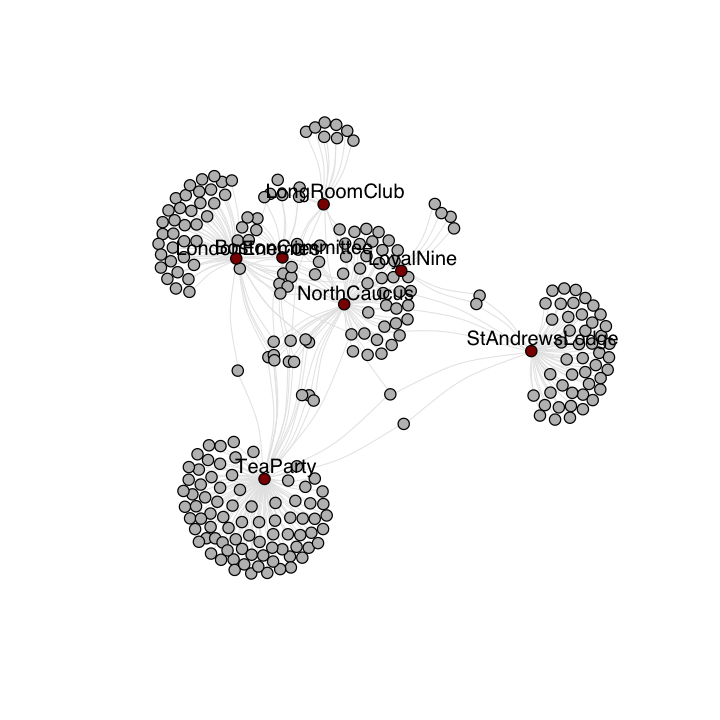

In [184]:
options(repr.plot.width = 6, repr.plot.height = 6)
plot(bipartite.revere, 
     vertex.color = ifelse(V(bipartite.revere)$type, "dark red", "gray"),
     vertex.size = 5,
     vertex.label = ifelse(V(bipartite.revere)$type, V(bipartite.revere)$name, NA),
     vertex.label.dist = 1,
     vertex.label.family = "Helvetica",
     vertex.label.color = "black",
     edge.color = "gray90",
     edge.width = 0.75,
     edge.curved = 0.2)

You may see a bit of a pattern here. Everything that has to do with the node itself in the arguments begins with `vertex`. Anything that has to do with the node names begins with `vertex.label`. We've added a few options here that have to do with the edges. Those, intuitively, begin with the keyword `edge`.

The igraph plotting parameters include (among others). You can get the [full documentation on igraph plotting online](http://igraph.org/r/doc/plot.common.html) or by typing `?igraph.plotting` into your R console.

Type  | Argument | Description
------|----------|---
NODES |          |
| vertex.color | Node color
| vertex.frame.color | Node border color
| vertex.shape | One of “none”, “circle”, “square”, “csquare”, “rectangle”, “crectangle”, “vrectangle”, “pie”, “raster”, or “sphere”
| vertex.size  | Size of the node (default is 15)
| vertex.size2 | The second size of the node (e.g. for a rectangle)
| vertex.label | Character vector used to label the nodes
| vertex.label.family | Font family of the label (e.g.“Times”, “Helvetica”)
| vertex.label.font   | Font: 1 plain, 2 bold, 3, italic, 4 bold italic, 5 symbol
| vertex.label.cex | Font size (multiplication factor, device-dependent)
| vertex.label.dist | Distance between the label and the vertex
| vertex.label.degree | The position of the label in relation to the vertex, where 0 is right, “pi” is left, “pi/2” is below, and “-pi/2” is above
EDGES | |
| edge.color | Edge color
| edge.width | Edge width, defaults to 1
| edge.arrow.size | Arrow size, defaults to 1
| edge.arrow.width | Arrow width, defaults to 1
| edge.lty | Line type, could be 0 or “blank”, 1 or “solid”, 2 or “dashed”, 3 or “dotted”, 4 or “dotdash”, 5 or “longdash”, 6 or “twodash”
| edge.label | Character vector used to label edges
| edge.label.family | Font family of the label (e.g.“Times”, “Helvetica”)
| edge.label.font | Font: 1 plain, 2 bold, 3, italic, 4 bold italic, 5 symbol
| edge.label.cex | Font size for edge labels
| edge.curved | Edge curvature, range 0-1 (FALSE sets it to 0, TRUE to 0.5)
| arrow.mode  | Vector specifying whether edges should have arrows, possible values: 0 no arrow, 1 back, 2 forward, 3 both
OTHER |  | 
| margin | Empty space margins around the plot, vector with length 4
| frame | if TRUE, the plot will be framed
| main | If set, adds a title to the plot
| sub | If set, adds a subtitle to the plot
| asp | Numeric, the aspect ratio of a plot (y/x).
| palette | A color palette to use for vertex color
| rescale | Whether to rescale coordinates to [-1,1]. Default is TRUE.

Without any options, the default plot is a bit of a mess. Let's work with the one-mode network for simplicity's sake.

In [178]:
data.revere <- as.matrix(data.revere) 

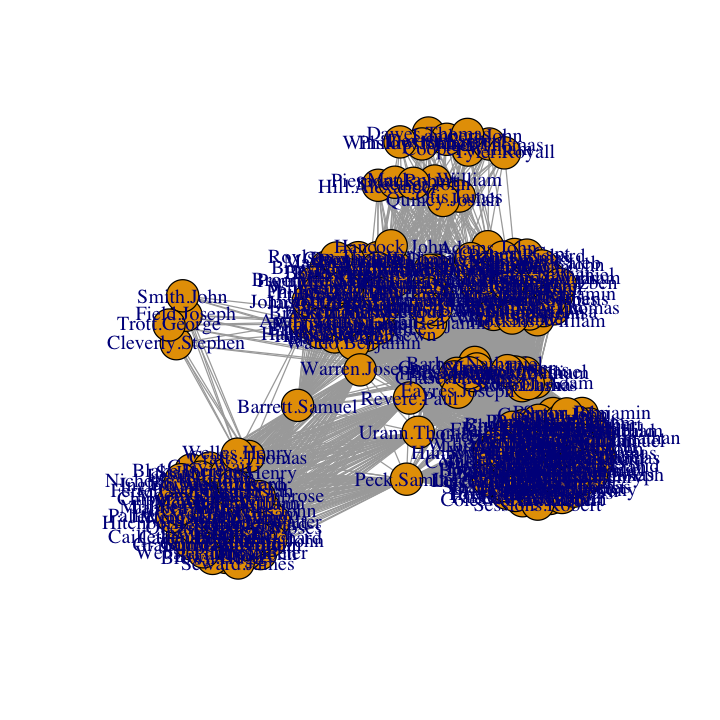

In [185]:
person.net <- data.revere %*% t(data.revere)
revere.person.g <- graph.adjacency(person.net, mode="undirected", weighted=NULL, diag=FALSE)
revere.person.g <- simplify(revere.person.g)
plot(revere.person.g)

Removing the labels would go a long way in simplifying this. We can also adjust the size to be uniform. Also, let's get rid of this disgusting default orange color.

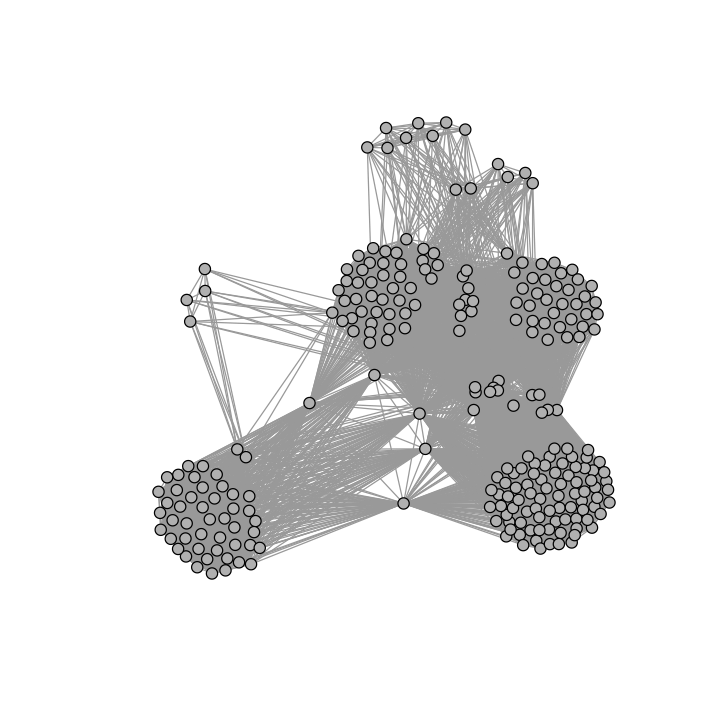

In [186]:
plot(revere.person.g,
    vertex.label = NA,
    vertex.color = 'gray',
    vertex.size = 5)

Now that we are building on a single network, we can begin changing visual attributes within the `igraph` object itself.

In [187]:
V(revere.person.g)$color = 'gray'
V(revere.person.g)$size = 5
V(revere.person.g)$label = NA

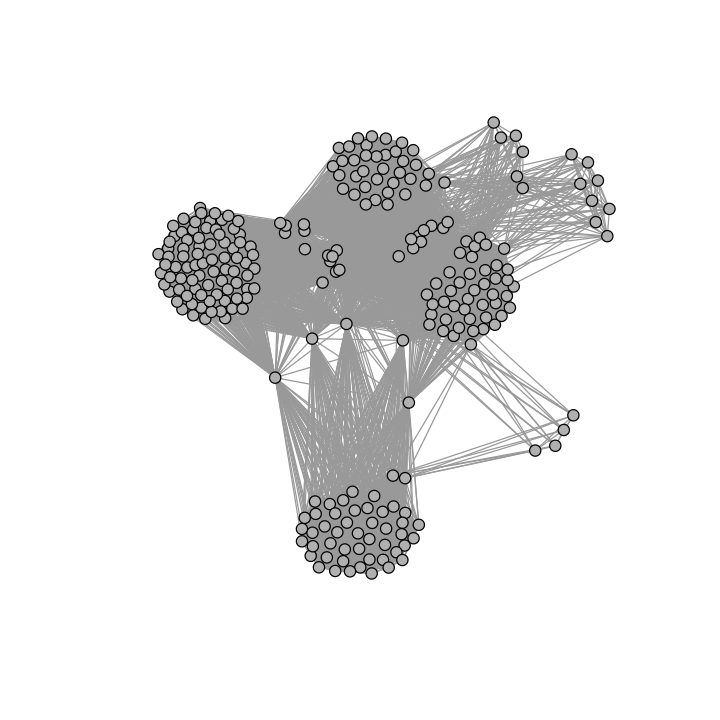

In [188]:
plot(revere.person.g)

Values don't have to be a fixed value, however. We can assign values based on node or edge attributes. For instance, it may be the case that it's helpful to have nodes that have more edges coming into them (called the node *degree*) to be larger. We can obtain the degree with the `degree` function. We'll use the `scale` function to normalize values.

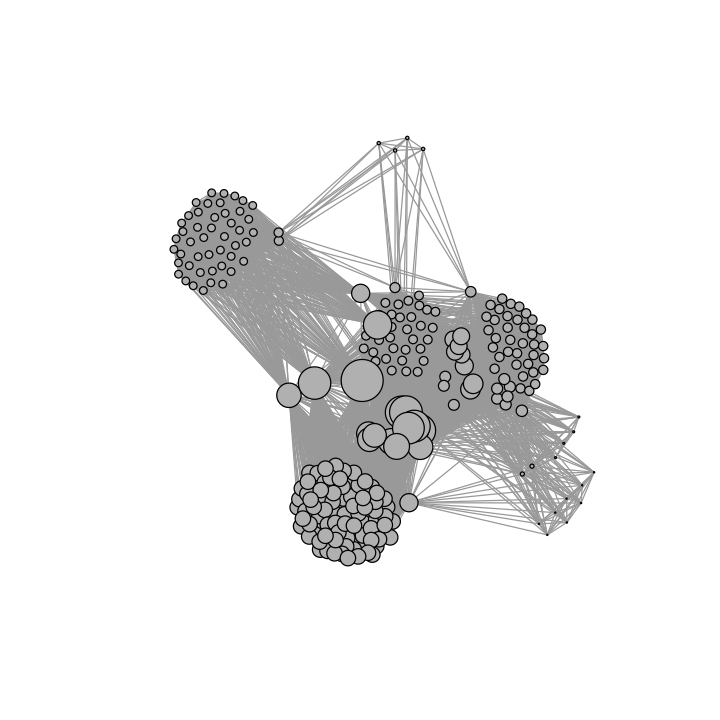

In [189]:
deg <- degree(revere.person.g)
deg_scaled <- scale(degree(revere.person.g))
V(revere.person.g)$size <- (deg_scaled + abs(min(deg_scaled)))*3
plot(revere.person.g)

That's a bit more informative. Now that we've done that, we should do something about the edges. They are the same color as the the nodes and they are pretty tangled. We can make them thinner and lighten the color a bit. We can also add a curve, which may help with the overlap.

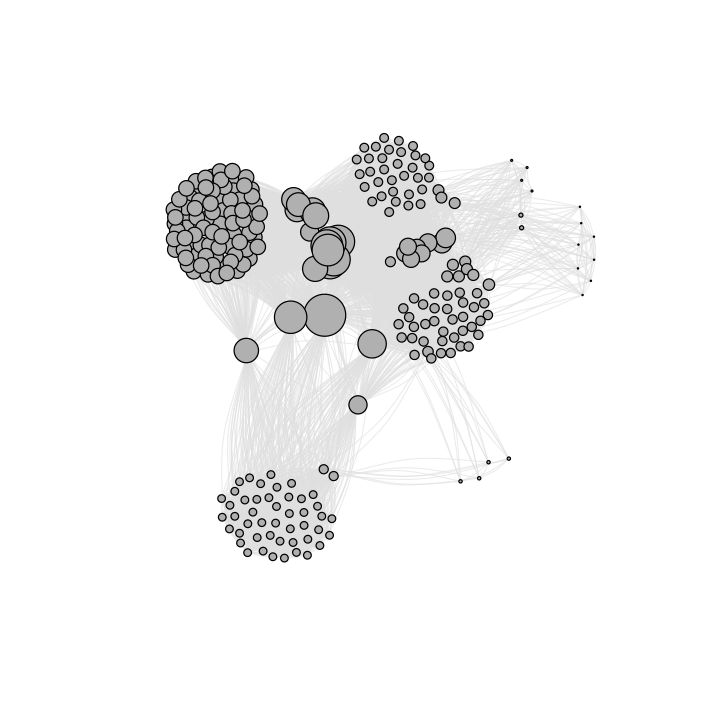

In [191]:
E(revere.person.g)$width = 0.5
E(revere.person.g)$color = "gray90"
E(revere.person.g)$curved = 0.2
plot(revere.person.g)

We're at a point where we have illustrated the structure of this network well. However, we don't seem to know much individuals in this network and how they are connected. In this case, we can begin using properties of the nodes themselves to highlight that information. Since this network is about Revere's connections, we'll begin by using that information to highlight his node.

Let's find him first and assign him a label. We can also assign him a different color.

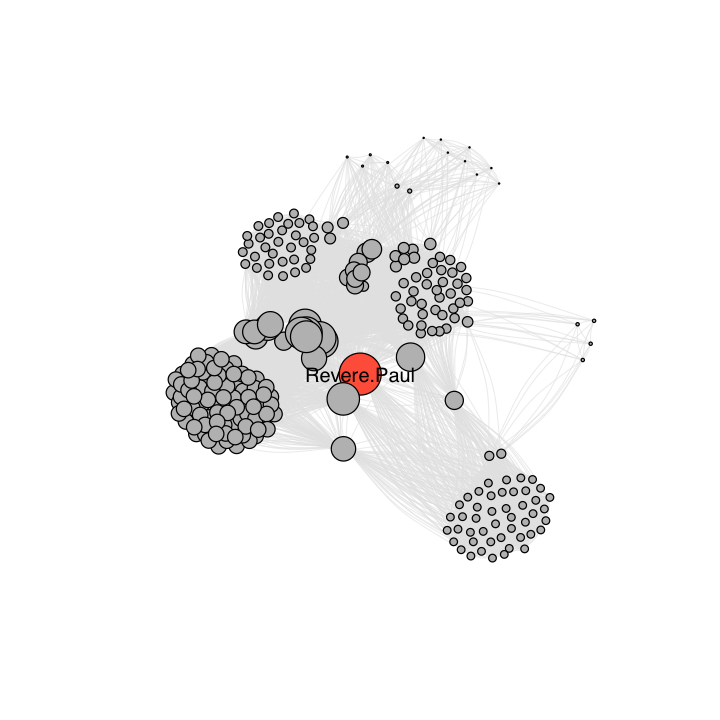

In [192]:
V(revere.person.g)$label = ifelse(V(revere.person.g)$name == "Revere.Paul", V(revere.person.g)$name, "")
V(revere.person.g)$color = ifelse(V(revere.person.g)$name == "Revere.Paul", "tomato", "gray")
V(revere.person.g)$label.color = "black"
V(revere.person.g)$label.family = "Helvetica"
plot(revere.person.g)

We could, more generally, highlight anyone with a degree of a certain size.

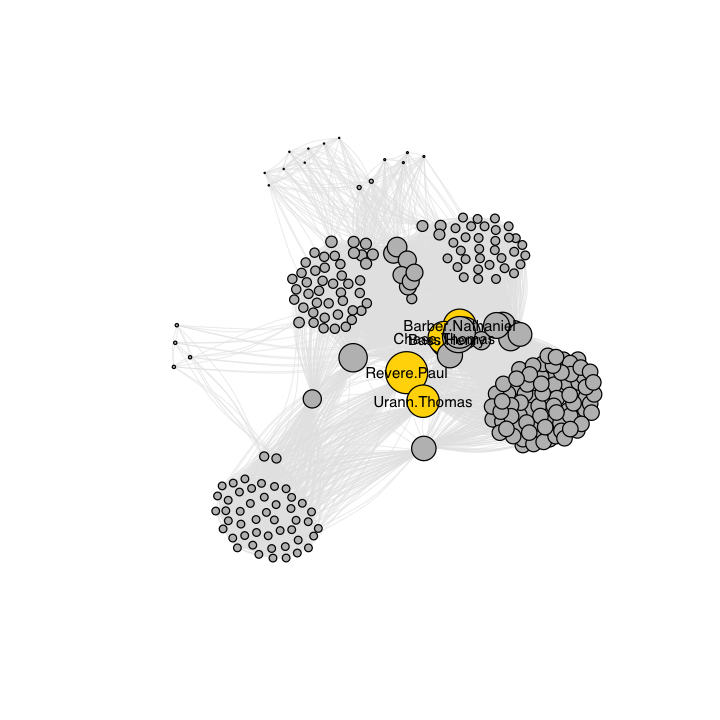

In [200]:
V(revere.person.g)$label = ifelse(degree(revere.person.g) > 190, V(revere.person.g)$name, "")
V(revere.person.g)$color = ifelse(degree(revere.person.g) > 190, "gold", "gray")

## label size is label.cex
V(revere.person.g)$label.cex = 0.75

plot(revere.person.g)

### Exercise 2

1. Let's return to the consulting network stored in `org.net`. Plot it with all the defaults. What do you notice? How could we clean this up?
2. The below code removes self-loops with `simplify`. Plot the network with node size set to 8, no node labels, and the default node color set to gray.

In [ ]:
org.net <- simplify(org.net)
plot(org.net,
    ____ = 8,
    ____ = ___,
    ____ = "gray")

<dd>3. You'll notice that this is a directed graph. That means there are now arrows. Include all the options from above, but do the operation on the `igraph` object. Then, set `edge.arrow.size` to 0.4.</dd>

In [ ]:
## vertex options
___$___ = 8
___$___ = __
___$___ = "gray"

## edge options
___$___ = 0.2

plot(org.net)

<dd>4. This is a weighted graph and we can use that information by changing the edge thickness. Set the width of the edge equal to the weight. Then, set the color of the edge equal to "gold" if it's greater than 3, otherwise set it equal to "gray60".

In [ ]:
## edge options
____$____ = ____$weight
____$____ = ifelse(____ > 3, ____, ____)

plot(org.net)

### Network layouts

Network layouts are algorithms for placing nodes nicely in a two- (or three-) dimensional space. Modern layouts attempt to do several different things. This graphic from Katya Ognyanova highlights this nicely.

![Layout aesthetics](img/layout-aesthetics.png)

Modern layouts attempt to:

1. Minimize edge crossing. It's easier to see edges if they do not cross each other.
2. Have uniform edge length. If it doesn't make sense to pull edges away from each other, then why bother?
3. Prevent overlap. This helps to clarify where the edges are going.
4. Symmetry. This spaces nodes out equally and is easier to read.

Let's return to our network and make the nodes a bit smaller and color them differently.

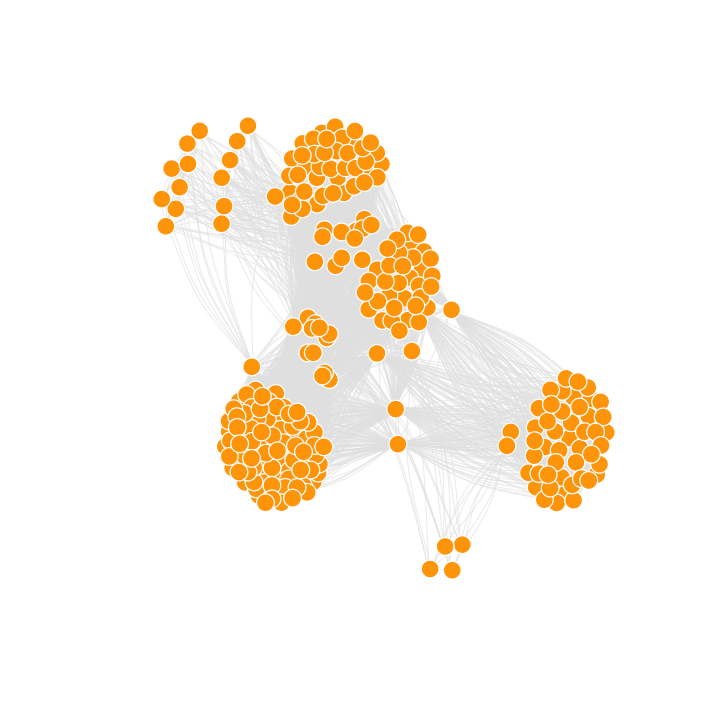

In [210]:
V(revere.person.g)$size = 8
V(revere.person.g)$color = "orange"
V(revere.person.g)$frame.color = "white"
V(revere.person.g)$label = NA
E(revere.person.g)$color = "gray90"

plot(revere.person.g)

The default layout for `igraph` is `layout_nicely`, which picks a layout appropriate for the graph. The default layout for this graph is a force-directed algorithm, namely, Fruchterman-Reingold, which is a very common layout.

Force-directed layouts try to get a nice-looking graph where edges are similar in length and cross each other as little as possible. They simulate the graph as a physical system. Nodes are electrically charged particles that repulse each other when they get too close. The edges act as springs that attract connected nodes closer together. As a result, nodes are evenly distributed through the chart area, and the layout is intuitive in that nodes which share more connections are closer to each other. The disadvantage of these algorithms is that they are rather slow and therefore less often used in graphs larger than ~1000 vertices.

Layouts are just points on a graph, so we can generate it beforehand, store it, and use it later.

Let's try this with `layout_randomly`, which places nodes randomly. This is helpful for very large graphs, in which trying to figure out an optimal layout would be computationally prohibitive.

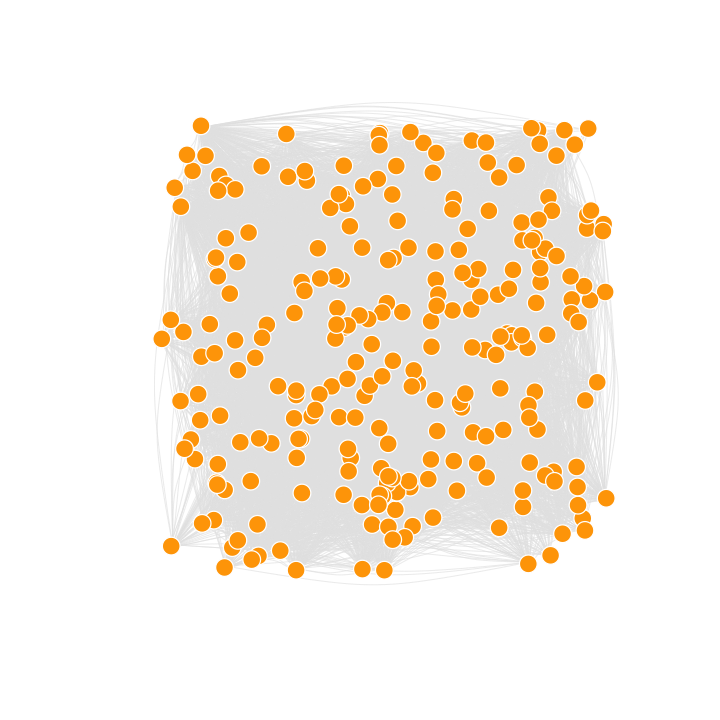

In [211]:
my_l = layout_randomly(revere.person.g)
plot(revere.person.g, layout = my_l)

For this network, it looks like a [Borg cube](http://memory-alpha.wikia.com/wiki/Borg_cube), so not super helpful here.

We can also layout in a circle, which can be helpful to see common communities. We'll use a somewhat smaller random network to illustrate this.

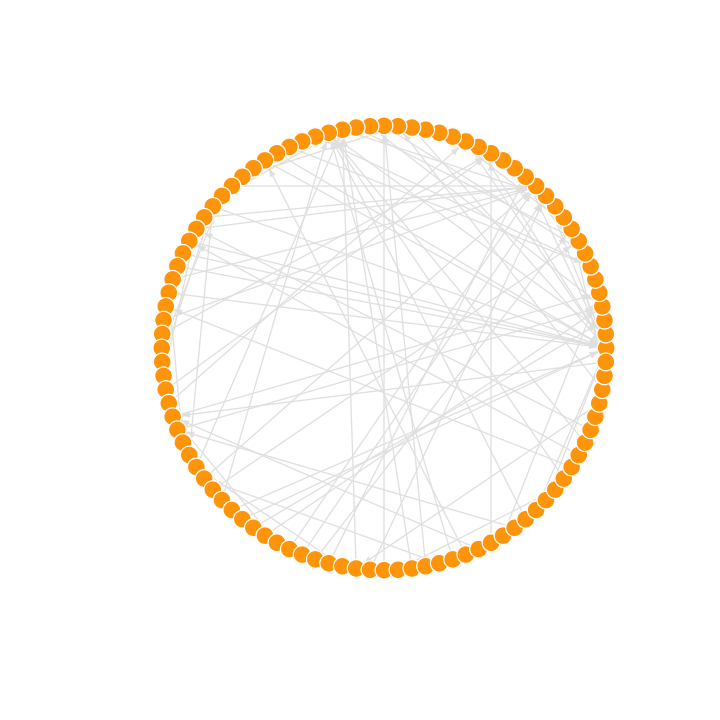

In [214]:
plot(sample_pa(100), 
    vertex.size = 8,
    vertex.color = "orange",
    vertex.frame.color = "white",
    vertex.label = NA,
    edge.color = "gray90",
    edge.arrow.size = 0.4,
    layout = layout_in_circle)

The LGL algorithm is meant for large, connected graphs. 

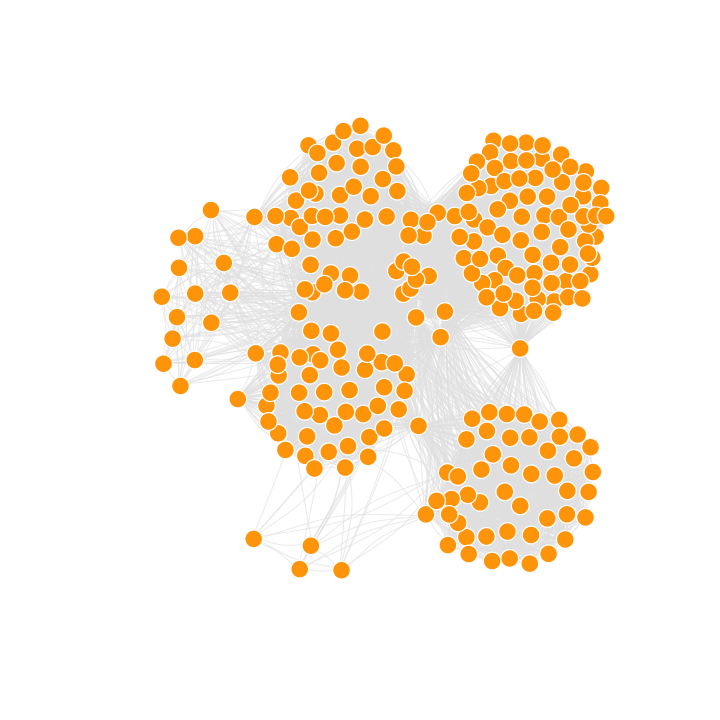

In [213]:
plot(revere.person.g, layout=layout_with_lgl)

### Highlighting communities

In [ ]:
- Highlighting communities and groups
- Highlighting particular nodes and edges
- Alternative graphs
    - Heatmap
    - Arcplot
    - Statistical charts
    - Biofabrics
- Interactive visualization
    - visNetwork
    - d3